<a href="https://colab.research.google.com/github/PythonDSBook/notebooks/blob/main/Chapter09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第9章 主成分分析

## 9.4 プログラミング

### コード 9.1 ライブラリのインポート

In [ ]:
!pip install japanize_matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

### コード 9.2 データの取得

In [4]:
URL = 'https://www.nstac.go.jp/sys/files/SSDSE-D-2023.csv'
df = pd.read_csv(URL, skiprows=[0, 2],
                  encoding='shift_jis')
columns = [
  'つり', '水泳', 'スキー・スノーボード', '登山・ハイキング',
  'サイクリング', 'ジョギング・マラソン',
  'ウォーキング・軽い体操', 'ヨガ'
 ]

df.loc[0:46, ['都道府県'] + columns]

,都道府県,つり,水泳,スキー・スノーボード,登山・ハイキング,サイクリング,ジョギング・マラソン,ウォーキング・軽い体操,ヨガ
0,北海道,8.8,4.7,8.3,6.1,7.5,9.7,40.6,5.0
1,青森県,9.4,3.2,4.4,4.0,4.0,8.1,32.0,2.7
2,岩手県,9.4,5.2,4.0,5.7,4.4,9.2,35.8,3.6
3,宮城県,9.1,5.9,3.9,6.4,6.5,11.5,40.9,4.7
4,秋田県,8.0,4.3,5.0,4.7,5.1,9.4,35.7,2.8
5,山形県,8.3,3.8,4.9,7.7,5.0,9.6,36.2,3.5
6,福島県,7.0,4.1,3.4,6.4,6.1,8.6,37.4,3.5
7,茨城県,6.6,4.9,2.5,8.8,9.2,11.5,45.2,5.0
8,栃木県,6.3,4.8,3.7,8.5,7.1,9.7,39.7,3.7
9,群馬県,5.5,4.0,4.5,8.3,7.9,10.8,45.8,4.3


### コード 9.3 データフレームの作成

In [5]:
activity_df = df.loc[0:46, columns]

In [6]:
activity_df

,つり,水泳,スキー・スノーボード,登山・ハイキング,サイクリング,ジョギング・マラソン,ウォーキング・軽い体操,ヨガ
0,8.8,4.7,8.3,6.1,7.5,9.7,40.6,5.0
1,9.4,3.2,4.4,4.0,4.0,8.1,32.0,2.7
2,9.4,5.2,4.0,5.7,4.4,9.2,35.8,3.6
3,9.1,5.9,3.9,6.4,6.5,11.5,40.9,4.7
4,8.0,4.3,5.0,4.7,5.1,9.4,35.7,2.8
5,8.3,3.8,4.9,7.7,5.0,9.6,36.2,3.5
6,7.0,4.1,3.4,6.4,6.1,8.6,37.4,3.5
7,6.6,4.9,2.5,8.8,9.2,11.5,45.2,5.0
8,6.3,4.8,3.7,8.5,7.1,9.7,39.7,3.7
9,5.5,4.0,4.5,8.3,7.9,10.8,45.8,4.3


### コード 9.4 各特徴の記述統計量の計算

In [7]:
activity_df.describe()

,つり,水泳,スキー・スノーボード,登山・ハイキング,サイクリング,ジョギング・マラソン,ウォーキング・軽い体操,ヨガ
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,8.563830,5.061702,2.904255,6.795745,6.627660,9.991489,41.312766,4.627660
std,1.810768,1.076135,1.966785,1.778612,1.921017,1.544109,3.955602,1.107033
min,5.000000,3.200000,0.200000,2.400000,2.700000,7.300000,32.000000,2.700000
25%,7.100000,4.350000,1.250000,5.650000,5.550000,9.000000,38.400000,3.900000
50%,8.500000,4.900000,2.700000,6.400000,6.400000,9.800000,41.100000,4.500000
75%,9.850000,5.650000,4.150000,8.300000,7.550000,10.750000,44.250000,5.300000
max,12.200000,8.600000,8.300000,9.800000,14.400000,15.300000,52.300000,8.400000


### コード 9.5 データの標準化

In [8]:
X = activity_df.values
X = (X - X.mean(axis=0)) / X.std(axis=0)

### プログラム 9.1 関数`compute_convariance_matrix`

In [9]:
def compute_covariance_matrix(X):
  m, n = X.shape
  cov_matrix = np.zeros((n, n))
  means = X.mean(axis=0)

  for i in range(n):
    for j in range(n):
      cov_matrix[i, j] = np.sum(
        (X[:, i] - means[i]) * (X[:, j] - means[j])
      ) / m

  return cov_matrix

In [10]:
def compute_covariance_matrix(X):
  m, n = X.shape
  cov_matrix = np.zeros((n, n))
  means = X.mean(axis=0)

  for i in range(n):
    for j in range(n):
      cov_matrix[i, j] = np.sum((X[:, i] - means[i]) * (X[:, j] - means[j])) / m

  return cov_matrix

### コード 9.6 分散共分散行列の計算

In [11]:
# 関数compute_convariance_matrixの処理を以下で置き換え
# X_centered = X - means
# cov_matrix = np.dot(X_centered.T, X_centered) / m

### コード 9.7 NumPyの関数`cov`を用いた分散共分散行列の計算

In [12]:
# 関数compute_convariance_matrixの処理を以下で置き換え
# cov_matrix = np.cov(X, rowvar=False, ddof=0)

### プログラム 9.2 関数`dimensionality_reduction`

In [13]:
def dimensionality_reduction(X, k):
  cov_matrix = compute_covariance_matrix(X)

  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  idx = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:, idx]

  components = eigenvectors[:, :k]
  variances = eigenvalues[:k]

  X_reduced = np.dot(X, components)

  sum_eigenvalues = np.sum(eigenvalues)
  var_ratio = variances / sum_eigenvalues
  cum_var_ratio = np.sum(variances) / sum_eigenvalues

  return (
    X_reduced, components, variances,
    var_ratio, cum_var_ratio
  )

In [14]:
def dimensionality_reduction(X, k):
  cov_matrix = compute_covariance_matrix(X)

  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  idx = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:, idx]

  components = eigenvectors[:, :k]
  variances = eigenvalues[:k]

  X_reduced = np.dot(X, components)

  sum_eigenvalues = np.sum(eigenvalues)
  var_ratio = variances / sum_eigenvalues
  cum_var_ratio = np.sum(variances) / sum_eigenvalues

  return X_reduced, components, variances, var_ratio, cum_var_ratio

### コード 9.8 関数`dimensionality_reduction`の実行

In [15]:
(
  X_reduced, components, variances,
  var_ratio, cum_var_ratio
) = dimensionality_reduction(X, 2)

In [16]:
X_reduced, components, variances, var_ratio, cum_var_ratio = dimensionality_reduction(X, 2)

### コード 9.9 主成分

In [17]:
pd.DataFrame(components.T, index=['PC1', 'PC2'],
              columns=columns)

,つり,水泳,スキー・スノーボード,登山・ハイキング,サイクリング,ジョギング・マラソン,ウォーキング・軽い体操,ヨガ
PC1,-0.315516,0.288009,0.128477,0.349752,0.441659,0.376304,0.399456,0.427125
PC2,0.457960,0.286622,-0.631500,-0.370102,-0.005227,0.248810,0.299325,0.144301


### コード 9.10 特徴間の相関係数の計算とヒートマップの可視化

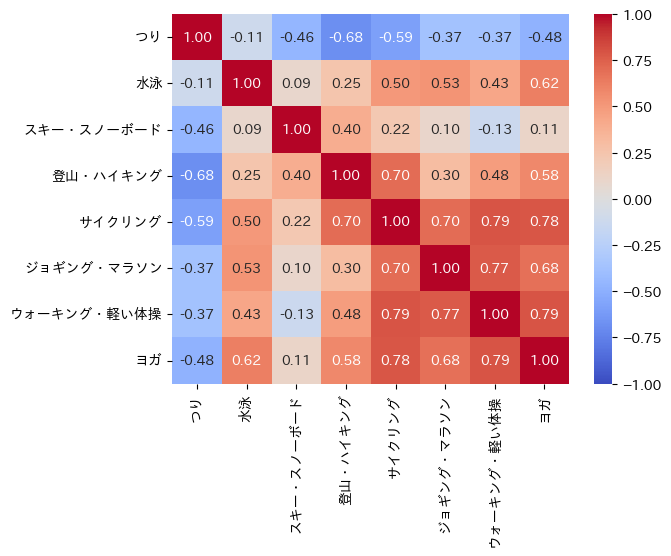

In [18]:
sns.heatmap(activity_df.corr(), cmap='coolwarm',
              annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()

### コード 9.11 各主成分の分散、寄与率、および累積寄与率の表示

In [19]:
print('variances: ', np.round(variances, 3))
print('variance ratio: ', np.round(var_ratio, 4))
print(f'cumulative variance ratio: {cum_var_ratio:.4f}')

variances:  [4.439 1.522]
variance ratio:  [0.5549 0.1903]
cumulative variance ratio: 0.7452


### コード 9.12 主成分が定める2次元空間でのデータの可視化

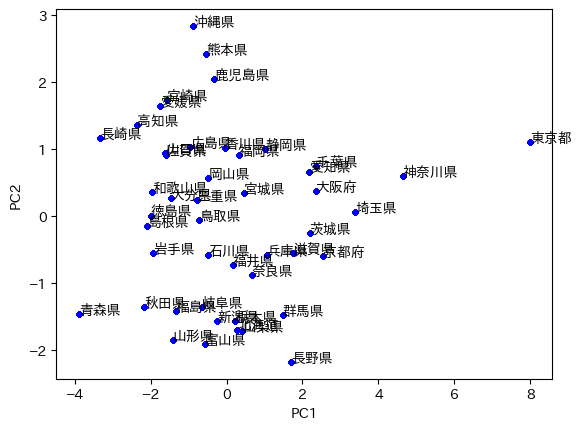

In [20]:
prefectures = df.loc[0:46, '都道府県']

for i, label in enumerate(prefectures):
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
              c='blue', s=10)
  plt.annotate(label, (X_reduced[i, 0], X_reduced[i, 1]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

図の大きさ指定

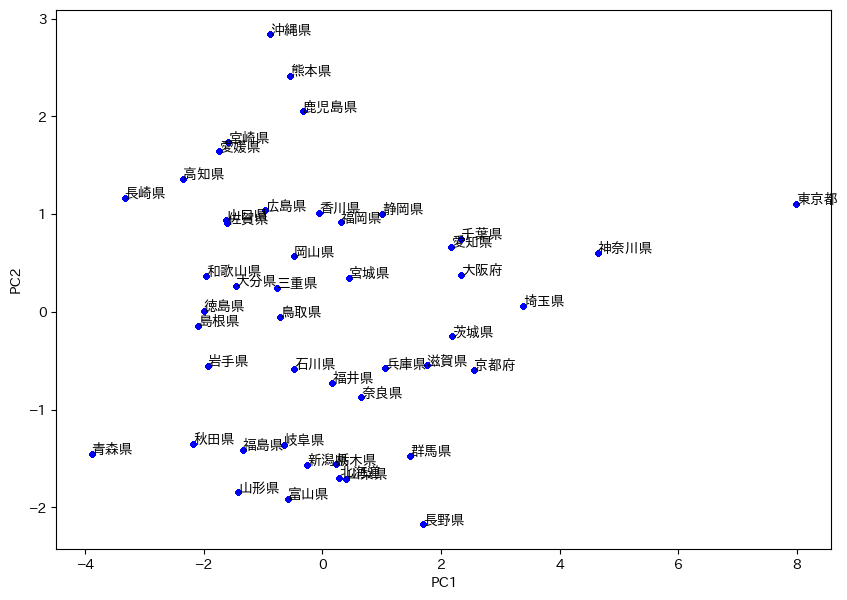

In [21]:
prefectures = df.loc[0:46, '都道府県']

plt.figure(figsize=(10,7))

for i, label in enumerate(prefectures):
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='blue', s=10)
  plt.annotate(label, (X_reduced[i, 0], X_reduced[i, 1]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### コード 9.13 主成分と特徴の間の相関係数の計算

In [22]:
correlation_coefs = components * np.sqrt(variances)
pd.DataFrame(correlation_coefs.T, index=['PC1', 'PC2'],
              columns=columns)

,つり,水泳,スキー・スノーボード,登山・ハイキング,サイクリング,ジョギング・マラソン,ウォーキング・軽い体操,ヨガ
PC1,-0.664784,0.606828,0.270698,0.736918,0.930564,0.792864,0.841644,0.899941
PC2,0.565031,0.353635,-0.779146,-0.456633,-0.006449,0.306982,0.369307,0.178038


### 図 9.8

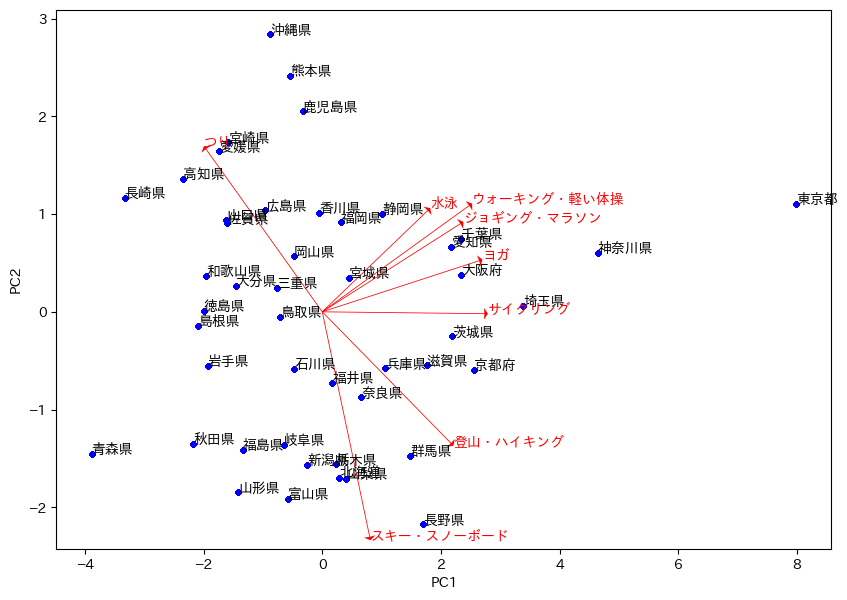

In [23]:
prefectures = df.loc[0:46, '都道府県']

plt.figure(figsize=(10,7))

for i, label in enumerate(prefectures):
  plt.scatter(X_reduced[:, 0], X_reduced[:,1], c='blue', s=10)
  plt.annotate(label, (X_reduced[i, 0], X_reduced[i, 1]))

for i, label in enumerate(columns):
  x, y = 3 * correlation_coefs[i]
  plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='red', width=0.001, headwidth=15)
  plt.text(x, y, label, c='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### コード 9.14 scikit-learnの`PCA`クラスによる主成分分析

In [24]:
from sklearn.decomposition import PCA
k = 2
model = PCA(n_components=k)
model.fit(X)
X_reduced = model.transform(X)
print(model.explained_variance_ratio_)
print(np.sum(model.explained_variance_ratio_))

[0.55491821 0.19028302]
0.7452012331949545


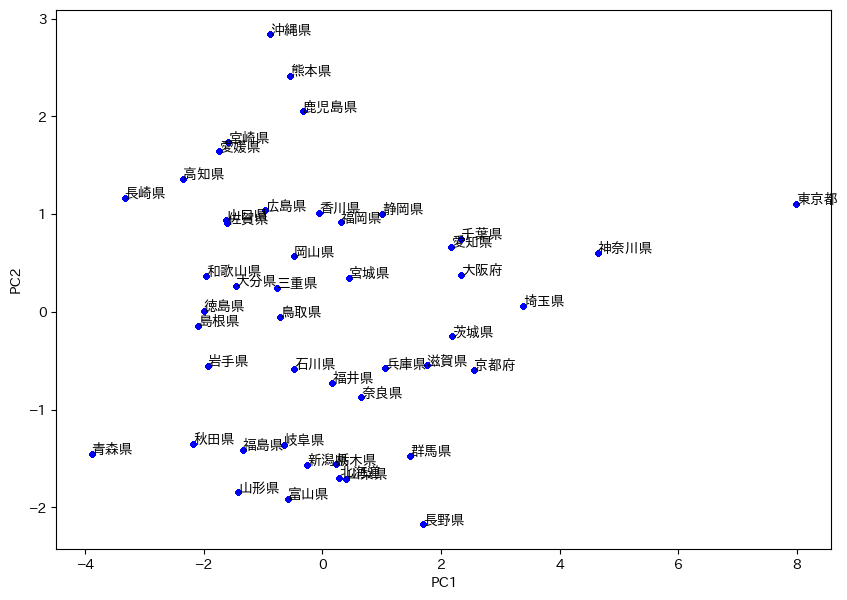

In [25]:
prefectures = df.loc[0:46, '都道府県']

plt.figure(figsize=(10,7))

for i, label in enumerate(prefectures):
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='blue', s=10)
  plt.annotate(label, (X_reduced[i, 0], X_reduced[i, 1]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()